In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from RobotSim373 import *

Version:  0.0.14


In [3]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    
    connect(left,right,'weld')  # revolves around the middle of the second object

In [4]:
def act(t,robot):
    
    if t<1.5:
        robot['left'].F=10
        robot['right'].F=10
    else:
        robot['left'].F=0
        robot['right'].F=0
        
    

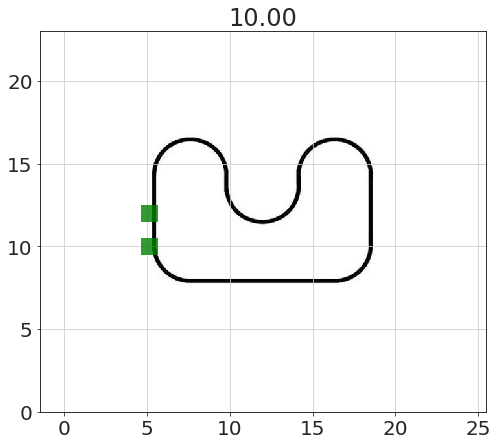

In [5]:
env=Environment(image='images/linepath1.jpeg',linearDamping=10) 
robot=Robot(env)

build(robot)

run_sim(env,act,
        total_time=10,  # seconds
        dt=1/60,
        dt_display=.1,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

In [23]:
def forward_until_black(t,robot):
    
    color=robot['left'].read_color()
    
    if color[0]>150:
        robot['left'].F=20
        robot['right'].F=20
    else:
        robot['left'].F=0
        robot['right'].F=0
        
    robot.message=color

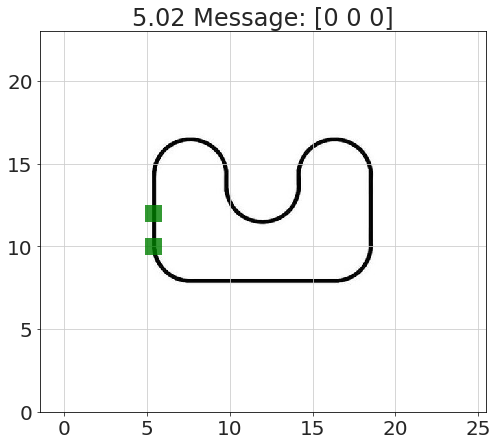

In [24]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)

run_sim(env,forward_until_black,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.2,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

In [31]:
def turn_90_degrees(t,robot):
    
    if t<1.8:
        robot['left'].F=-10
        robot['right'].F=10
    else:
        robot['left'].F=0
        robot['right'].F=0
     
    
    

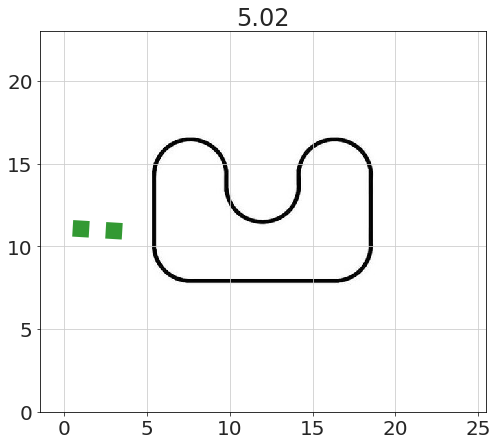

In [32]:
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)

run_sim(env,turn_90_degrees,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.2,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

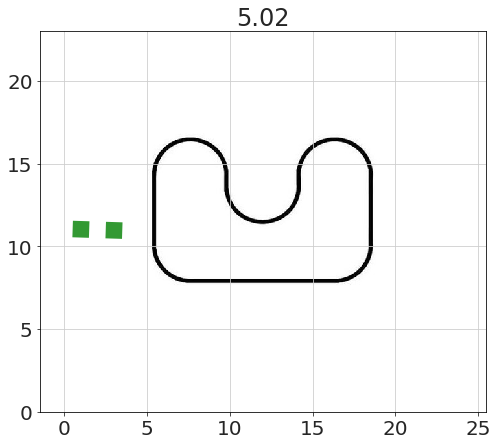

In [39]:
def turn_90_degrees(t,robot):
    
    if t<0.9:
        robot['left'].F=-10
        robot['right'].F=10
    else:
        
        d=robot['left'].read_distance()
        if d<robot.last_distance:
            robot['left'].F=-10
            robot['right'].F=10
            robot.last_distance=d
        else:
            robot['left'].F=0
            robot['right'].F=0
     
    robot.storage+=t,robot['left'].read_distance()
    
    
# turn for .9 seconds
# turn until the distance increases
# stop

    
    
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)
robot.storage=Storage()
robot.last_distance=500

run_sim(env,turn_90_degrees,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.2,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

In [37]:
t,d=robot.storage.arrays()

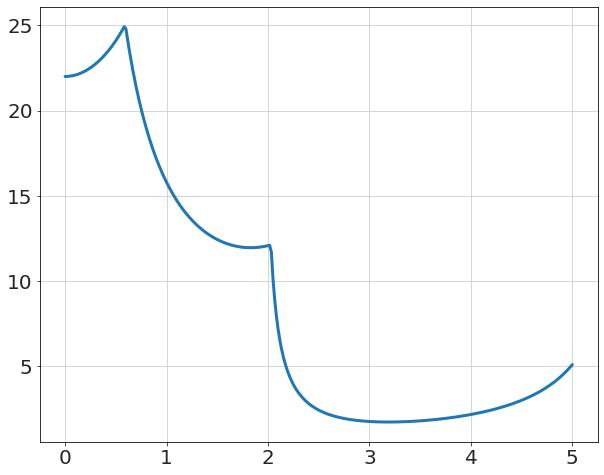

In [38]:
plot(t,d)

# rewriting the act function to be more procedural

1. turn for 0.9 seconds
2. turn until min distace
3. stop


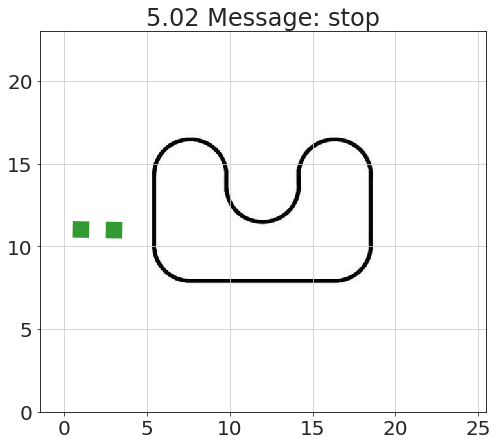

In [47]:
def turn_a_bit(t,robot):
    
    robot.message = 'turn'
    if t<0.9:
        robot['left'].F=-10
        robot['right'].F=10
        return False        # not done yet!
    else:
        return True        #  done with this behavior
    
    
def turn_to_min_distance(t,robot):
    robot.message = 'min distance'
    
    d=robot['left'].read_distance()
    if d<robot.last_distance:
        robot['left'].F=-10
        robot['right'].F=10
        robot.last_distance=d
        return False
    else:
        return True
    
def stop(t,robot):
    robot.message = 'stop'
    robot['left'].F=0
    robot['right'].F=0
    
    return False  # never done
    

def turn_90_degrees(t,robot):
    
    actions=[turn_a_bit,turn_to_min_distance,stop]
    
    if t==0.0:  # first time
        robot.current_action=0
        robot.start_time=0.0
        
    action=actions[robot.current_action]
    
    value=action(t-robot.start_time,robot)
    
    if value:  # done with this action
        robot.current_action+=1
        

    robot.storage+=t,robot['left'].read_distance()

    
env=Environment(image='images/linepath1.jpeg',linearDamping=20) 
robot=Robot(env)

build(robot)
robot.storage=Storage()
robot.last_distance=500

run_sim(env,turn_90_degrees,
        total_time=5,  # seconds
        dt=1/60,
        dt_display=.2,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )    

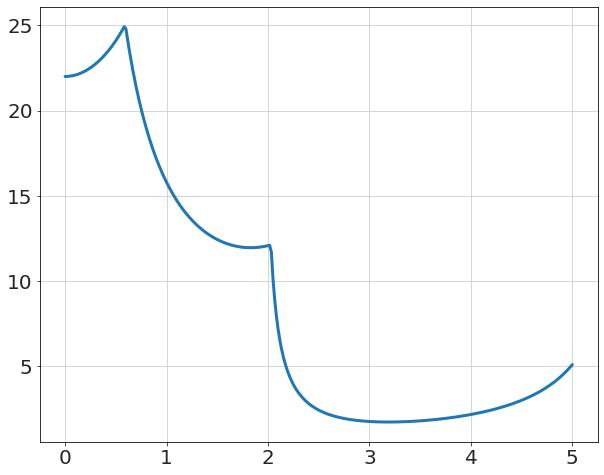

In [46]:
t,d=robot.storage.arrays()
plot(t,d)